# Iris Dataset : Visualization & Classification Practice

### 1. [Data Exploration &Visualization](#1-bullet) <br>
### 2. [Classification Task](#2-bullet)<br>

REFERENCES:<br><br>
    http://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb<br><br>https://www.kaggle.com/benhamner/python-data-visualizations<br><br>http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\sgus1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

## 1. Data Exploration & Visualization  <a class="anchor" id="1-bullet"></a>

In [3]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.100,3.500,1.400,0.200,Iris-setosa
1,4.900,3.000,1.400,0.200,Iris-setosa
2,4.700,3.200,1.300,0.200,Iris-setosa
3,4.600,3.100,1.500,0.200,Iris-setosa
4,5.000,3.600,1.400,0.200,Iris-setosa


In [4]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [5]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

![Chart Image](https://user-images.githubusercontent.com/30188729/35997151-7ddd73d6-0ccd-11e8-9af0-406209b7d020.png)

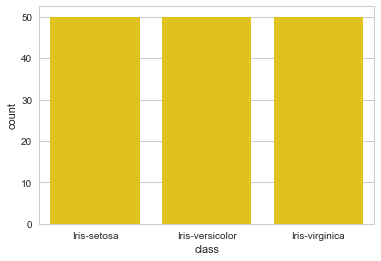

In [6]:
sns.countplot('class',data=df,color='gold')

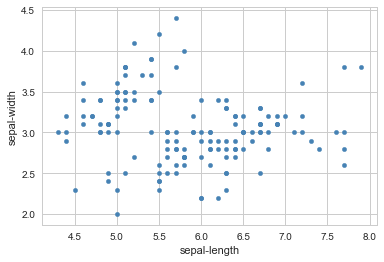

In [7]:
df.plot(kind="scatter", x="sepal-length", y="sepal-width",color='steelblue')

In [8]:
current_palette = sns.color_palette()
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

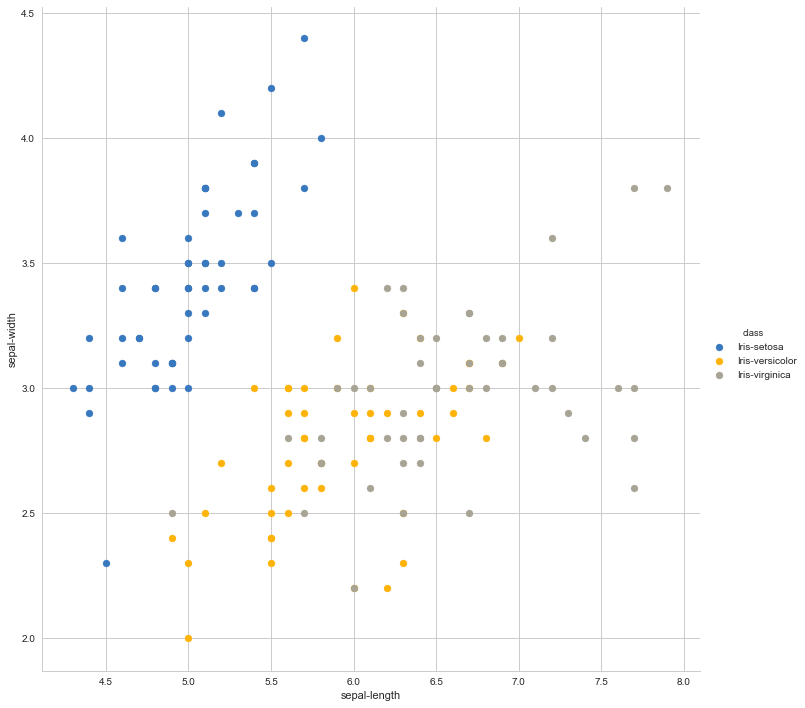

In [9]:
sns.FacetGrid(df, hue="class", size=10) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()

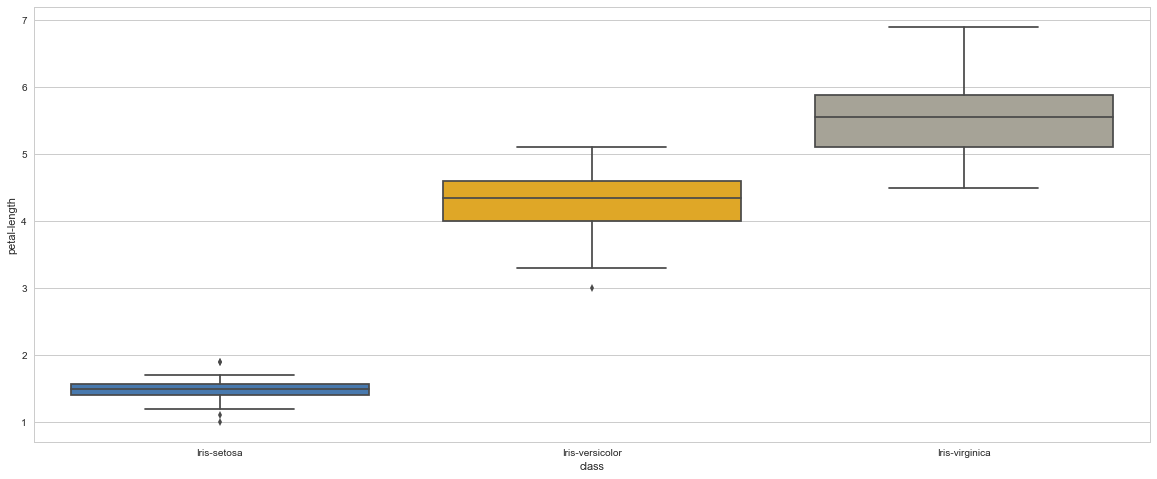

In [10]:
plt.figure(figsize=(20,8))
sns.boxplot(x="class", y="petal-length", data=df)

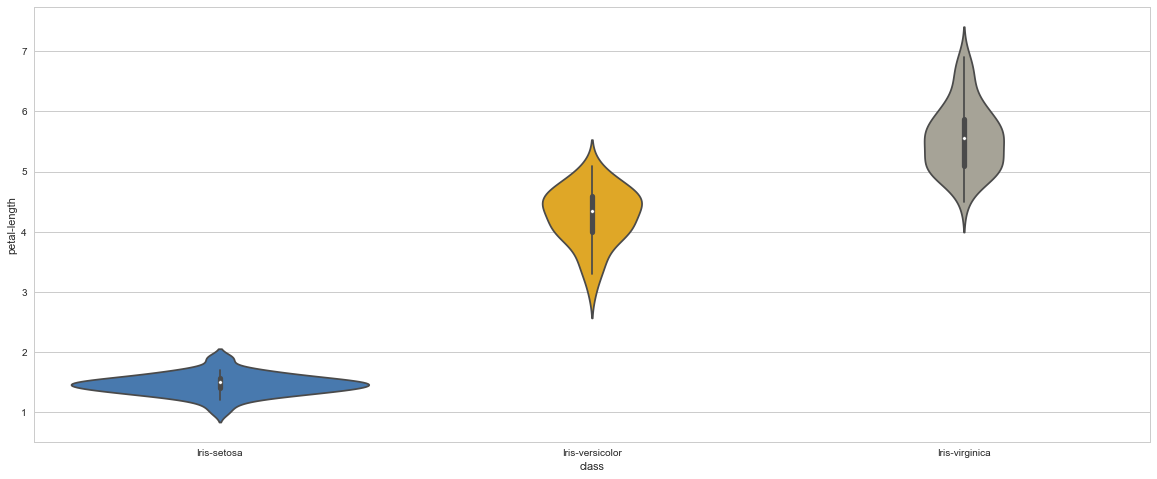

In [11]:
plt.figure(figsize=(20,8))
sns.violinplot(x="class", y="petal-length", data=df, size=16)

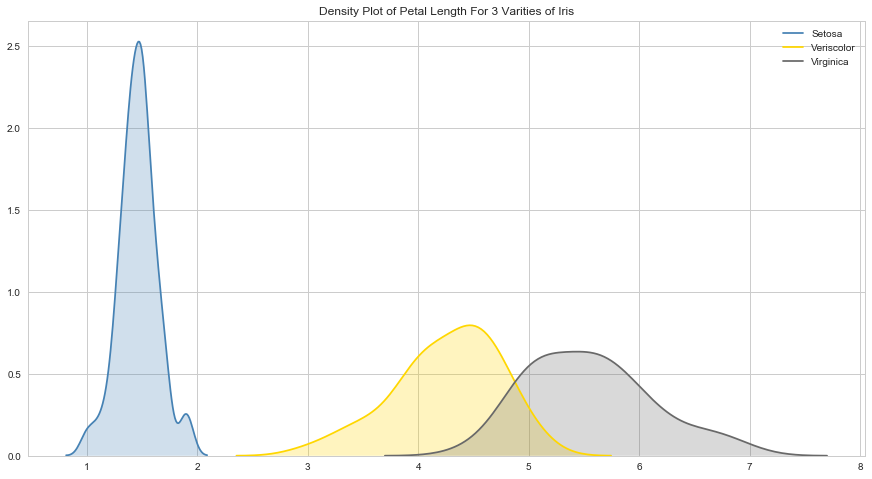

In [12]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["petal-length"][df['class'] == 'Iris-setosa'], color="steelblue", shade=True)
sns.kdeplot(df["petal-length"][df['class'] == 'Iris-versicolor'], color="gold", shade=True)
sns.kdeplot(df["petal-length"][df['class'] == 'Iris-virginica'], color="dimgray", shade=True)
plt.legend(['Setosa', 'Veriscolor','Virginica'])
plt.title('Density Plot of Petal Length For 3 Varities of Iris')
plt.show()

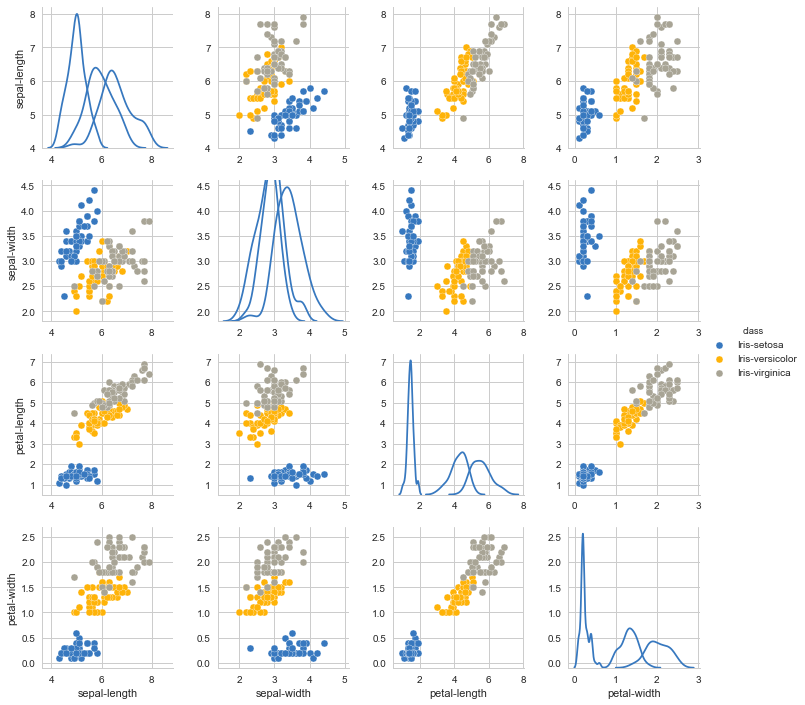

In [13]:
sns.pairplot(df, hue="class", diag_kind="kde")

Below is a kdeplot of sepal_length versus sepal width for setosa species of flower:

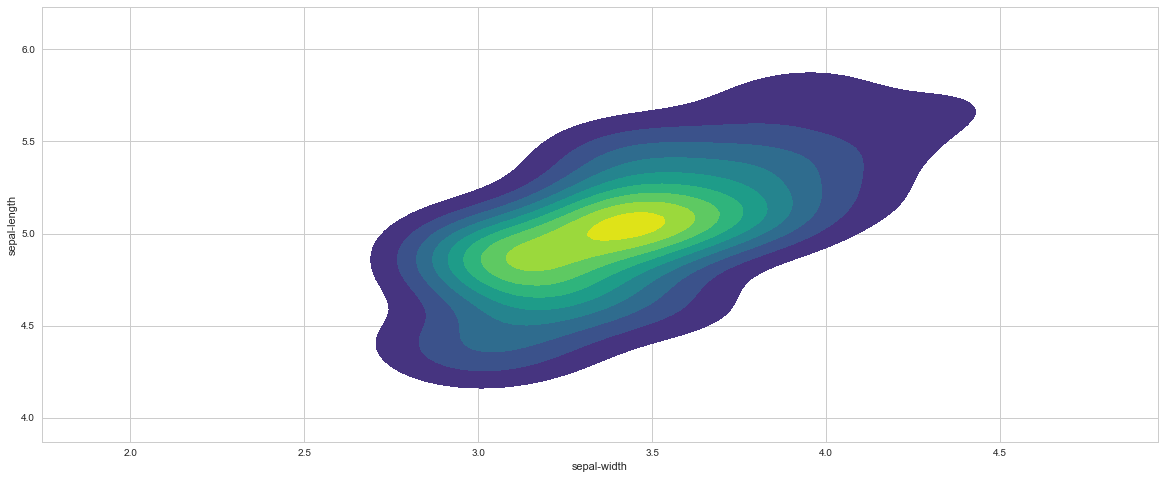

In [14]:
plt.figure(figsize=(20,8))
setosa = df[df['class']=='Iris-setosa']
sns.kdeplot( setosa['sepal-width'], setosa['sepal-length'],
                 cmap="viridis", shade=True, shade_lowest=False)

## 2. Classification Task <a class="anchor" id="2-bullet"></a>

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

In [16]:
X=train.drop('class',axis=1)
y=train['class']

### Decision Tree

In [17]:
from sklearn import tree
import graphviz
tree = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=10)

In [18]:
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
tree.score(X, y)

0.98095238095238091

#### Cross Validation

In [20]:
X_test=test.drop('class',axis=1)
y_test=test['class']

In [21]:
tree.score(X_test, y_test)

0.91111111111111109

Strong in-sample and out-of-sample performance by the decision tree model. Could also try logistic regression, SVM, etc.

### Visualization of the decision boundries shamelessly borrowed from:<Br><br> http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

In [44]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

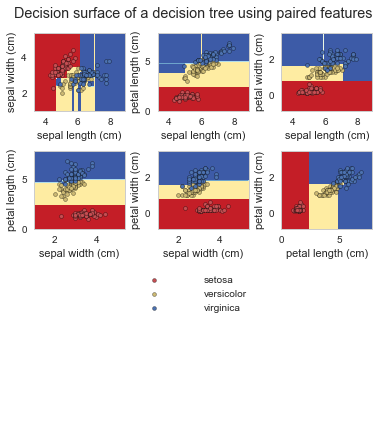

In [45]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(borderpad=12, handletextpad=4)
#plt.axis("tight")
plt.show()